In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

In [35]:
M = 1024 #Puntos en la señal
N = 1000 #Numero de señales
T = 3 #Duración de la señal
fs = M/T #frecuencia de muestreo

In [4]:
t = np.linspace(0, T, M) #vector tiempo

In [16]:
#Función que genera la señal periódica x(t)=cos(wot)-1/3sen(3wot)+1/5cos(5wot)
#frecuencia a 1Hz
def senal():
  #Frecuencias en Hz
  frecuencia1 = 1
  frecuencia2 = 3
  frecuencia3 = 5

  wo = 2*np.pi

  #Amplitudes
  Amplitud1 = 1
  Amplitud2 = 1/3
  Amplitud3 = 1/5

  senal = (Amplitud1*np.cos(wo*frecuencia1*t)- Amplitud2*np.sin(wo*frecuencia2*t)+Amplitud3*np.cos(wo*frecuencia3*t))

  return senal

In [17]:
#Funcion que genera ruido blanco gaussiano
def noise(media, nivel_de_ruido, tamaño): #nivel de ruido = 0.1, 0.3, 1

    ruido = np.random.normal(media, nivel_de_ruido, size = M)

    return ruido

In [39]:
#Función que calcula el psd usando welch
def calcular_psd(senal, fs, nperseg):
    f, Pxx_den = welch(senal, fs=fs, nperseg=nperseg)
    return f, Pxx_den

In [65]:
#se crean las señales de ejemplo
x = senal()                      #Señal sin ruido
x1 = senal() + noise(0, 0.1, M ) #señal con nivel de ruido 0.1
x2 = senal() + noise(0, 0.3, M ) #señal con nivel de ruido 0.3
x3 = senal() + noise(0, 1, M )   #señal con nivel de ruido 1

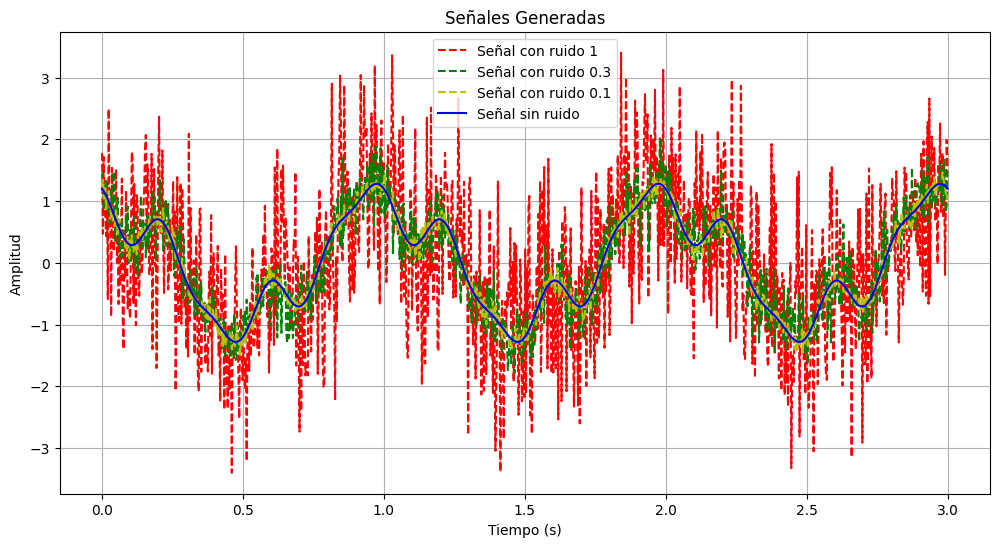

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(t, x3, 'r', label = 'Señal con ruido 1', linestyle = '--')
plt.plot(t, x2, 'g', label = 'Señal con ruido 0.3', linestyle = '--')
plt.plot(t, x1, 'y',label = 'Señal con ruido 0.1', linestyle = '--')
plt.plot(t, x, 'b', label = 'Señal sin ruido', linewidth=1.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señales Generadas')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
#Se calcula el psd de las señales creadas usando la función de welch
f, Pxx_x = calcular_psd(x, fs, M)
f1, Pxx_x1 = calcular_psd(x1, fs, M)
f2, Pxx_x2 = calcular_psd(x2, fs, M)
f3, Pxx_x3 = calcular_psd(x3, fs, M)

<ipython-input-68-95e65c786bae>:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


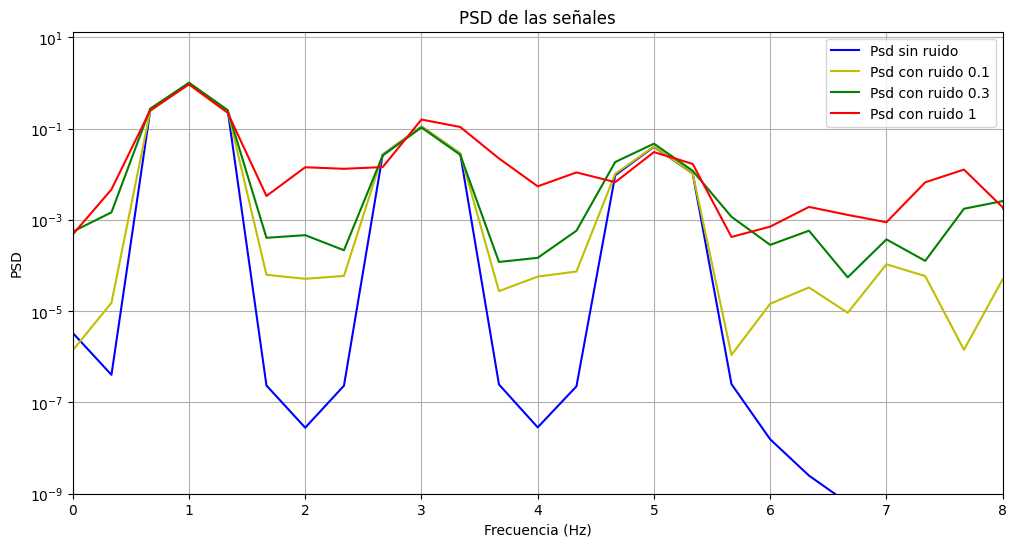

In [68]:
plt.figure(figsize=(12, 6))
plt.semilogy(f,Pxx_x, 'b', label = 'Psd sin ruido')
plt.semilogy(f1,Pxx_x1, 'y', label = 'Psd con ruido 0.1')
plt.semilogy(f2,Pxx_x2, 'g', label = 'Psd con ruido 0.3')
plt.semilogy(f3,Pxx_x3, 'r',  label = 'Psd con ruido 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.title('PSD de las señales')
plt.legend()
plt.grid(True)
plt.xlim(0,8)
plt.ylim(10**-9,0)
plt.show()

In [71]:
#dimensiones de los datos(importante para la red) generar varias señales para el entrenamiento
print(len(x))     #todas las señales tienen 1024 puntos (entrada de la red)
print(len(Pxx_x)) #todos los psd calculados tienen 513 puntos (salida de la red)

1024
513
